In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv('raw_data.csv', index_col=0)
print(df.size)
df.columns

67243


Index(['blue_0_rank', 'blue_1_rank', 'blue_2_rank', 'blue_3_rank',
       'blue_4_rank', 'red_0_rank', 'red_1_rank', 'red_2_rank', 'red_3_rank',
       'red_4_rank', 'winner'],
      dtype='object')

In [46]:
df_enhanced = pd.read_csv('raw_data_enhance.csv', index_col=0)
print(df_enhanced.size)
df_enhanced.columns

617413


Index(['rank_0_0', 'score_0_0', 'kills_0_0', 'deaths_0_0', 'assists_0_0',
       'bodyshots_0_0', 'headshots_0_0', 'legshots_0_0', 'damage_made_0_0',
       'damage_received_0_0',
       ...
       'score_1_4', 'kills_1_4', 'deaths_1_4', 'assists_1_4', 'bodyshots_1_4',
       'headshots_1_4', 'legshots_1_4', 'damage_made_1_4',
       'damage_received_1_4', 'winner'],
      dtype='object', length=101)

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Normalize the data
scaler = StandardScaler()

clf = SGDClassifier(loss='log_loss', penalty='l2', max_iter=10_000, tol=1e-3)
pipe = make_pipeline(scaler, clf)

# 80 percent of the data for training
train_size = int(0.8 * df_enhanced.shape[0])
X_train = df_enhanced.iloc[:train_size, :-1]
y_train = df_enhanced.iloc[:train_size, -1]
X_test = df_enhanced.iloc[train_size:, :-1]
y_test = df_enhanced.iloc[train_size:, -1]

# Fit the model
pipe.fit(X_train, y_train)
# Evaluate the model
score = pipe.score(X_test, y_test)
print(f'Test score: {score:.4f}')


Test score: 0.8994


Confusion Matrix:


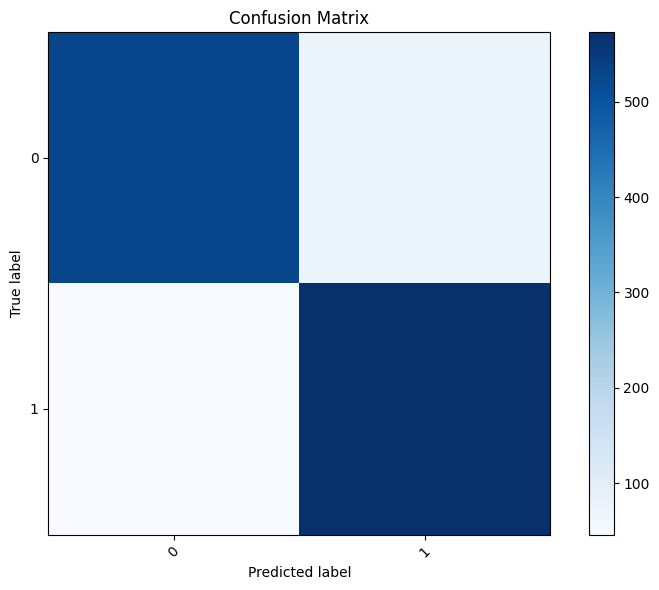

In [45]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = pipe.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')

plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks(np.arange(len(pipe.classes_)), pipe.classes_, rotation=45)
plt.yticks(np.arange(len(pipe.classes_)), pipe.classes_)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()